# Introducción
Para mejor visualización de estos notebooks, se recomienda instalar las extensiones de jupyter (Codefolding, Collapsible Headings, Initialization Cells). Dichas extensiones se instalan con los comandos de la siguiente celda:

In [ ]:
!pip3 install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!pip3 install jupyter_nbextensions_configurator
!jupyter nbextensions_configurator enable --user

In [ ]:
!pip3 install scipy numpy
!pip3 install sympy
!pip3 install matplotlib
# También es necesario que matplotlib tenga el backend de Qt instalado para los gráficos interactivos
!pip3 install PyQt5

Para cambiar de backend, poner en el notebook ``%matplotlib qt`` para usar Qt y ``%matplotlib inline`` para mostrar las gráficas como una imagen en el propio notebook. ``%matplotlib notebook`` proporciona una opción intermedia como gráfico interactivo embedido en el notebook

_A veces es necesario reiniciar el kernel del notebook si deja de funcionar la visualización con Qt_

In [1]:
# Celda de inicialización
import sympy as sym

def calcular_puntos_eq(f, x, **kwargs):
    """
    Calcula todos puntos de equilibrio de la ecuación dx/dt = f(x),
    imprime información sobre ellos (lista de soluciones, y para cada
    solución, matriz jacobiana evaluada en ese punto y autovalores)
    :param f: 
    :param x: vector de estados
    **kwargs:
        p0: diccionario para sustituir parámetros en f(x) empleando f.subs()
        x0: Si se pasa, en vez de calcular todos los puntos de 
        equilibrio, expande el sistema en x0
        print_info: si es True (por defecto) imprime información por pantalla
        evalf: si es True convierte los números simbólicos a coma flotante
    :return: lista de soluciones, matriz jacobiana y lista de autovalores (una por solución)."""
    
    p0 = kwargs.get('p0')
    x0 = kwargs.get('x0')
    print_info = kwargs.get('print_info', True)
    evalf = kwargs.get('evalf', False)
    
    if p0 is not None:
        f = f.subs(p0)
        
    if x0 is not None:
        solutions = [x0] # Usa el punto suministrado en vez de calcular soluciones
    else:
        solutions = sym.solve(f, x)
    
    if print_info:
        print(f"Puntos de equilibrio: {solutions}\n")
    J = f.jacobian(x)

    λ = []
    for p in solutions:
        # Creamos un diccionario de sustitución para x y p
        # dict(zip(x, p)) = {x[0]:p[0], x[1]:p[1], ..., x[n]:p[n]}
        J0 = J.subs(dict(zip(x, p)))
        egvs = J0.eigenvals(multiple=True)
        if print_info:
            print(f"Expandiendo J en el punto {p}")
            display(J0)
            print("Autovalores:")
        for egv in egvs:
            if (p0 is not None) or evalf:
                egv = egv.evalf()
            if print_info:
                display(egv)
        λ.append(egvs)
        

    return solutions, J, λ

# Ejercicio 1

In [5]:
import sympy as sym
from sympy.functions import Abs
    
x1 = sym.Symbol('x1', real=True)
x2 = sym.Symbol('x2', real=True)
x = sym.Matrix([x1, x2])

# Apartado a)
f = sym.Matrix([x2, -x1 + x2*(1 - x2**2)]).T
print("Apartado a)")
calcular_puntos_eq(f, x)
# Apartado b)
f = sym.Matrix([x2 - x1*Abs(x1), 1-x1])
print("Apartado b), puntos de equilibrio:")
calcular_puntos_eq(f, x)
# Apartado c)
f = sym.Matrix([x1*(1 - x2), x2*(x1 - 1)])
print("Apartado c), puntos de equilibrio:")
calcular_puntos_eq(f, x)
None

Apartado a)
Puntos de equilibrio: [(0, 0)]

Expandiendo J en el punto (0, 0)


Matrix([
[ 0, 1],
[-1, 1]])

Autovalores:


1/2 - sqrt(3)*I/2

1/2 + sqrt(3)*I/2

Apartado b), puntos de equilibrio:
Puntos de equilibrio: [(1, 1)]

Expandiendo J en el punto (1, 1)


Matrix([
[-2, 1],
[-1, 0]])

Autovalores:


-1

-1

Apartado c), puntos de equilibrio:
Puntos de equilibrio: [(0, 0), (1, 1)]

Expandiendo J en el punto (0, 0)


Matrix([
[1,  0],
[0, -1]])

Autovalores:


1

-1

Expandiendo J en el punto (1, 1)


Matrix([
[0, -1],
[1,  0]])

Autovalores:


I

-I

El punto de equilibrio del apartado a) tiene ambos autovalores con parte real positiva, luego podemos concluir que el sistema linealizado es inestable alrededor de este punto de equilibrio, y como tiene una parte imaginaria, podemos decir que va a oscilar (tenemos un foco inestable en el espacio de fases). El sistema completo no lineal será también inestable.

En el apartado b), ambos autovalores son negativos, así que el sistema lineal será estable y no oscilatorio porque su parte imaginaria es cero. El sistema completo no lineal será asintóticamente estable.

En el apartado c), los autovalores tienen parte real igual a 0, por lo que no podemos decir nada del sistema no lineal completo, que podrá ser estable, asintóticamente estable o inestable.

# Ejercicio 2

In [6]:
import sympy as sym

μ = sym.Symbol('μ')
τ = sym.Symbol('τ')
t = sym.Symbol('t')
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x = sym.Matrix([x1, x2])
# Hay que sustituir dx_1/dt en la segunda ecuación
f = sym.Matrix([x1 - x1*x2 - μ*x1**2, x1*x2 - x2 - τ*x2*(x1 - x1*x2 - μ*x1**2)])

solutions, J, λ = calcular_puntos_eq(f, x)

Puntos de equilibrio: [(0, 0), (1, 1 - μ), (1/μ, 0)]

Expandiendo J en el punto (0, 0)


Matrix([
[1,  0],
[0, -1]])

Autovalores:


1

-1

Expandiendo J en el punto (1, 1 - μ)


Matrix([
[                 -μ,        -1],
[μ*τ*(1 - μ) - μ + 1, τ*(1 - μ)]])

Autovalores:


-μ*τ/2 - μ/2 + τ/2 - sqrt(μ**2*τ**2 + 2*μ**2*τ + μ**2 - 2*μ*τ**2 - 2*μ*τ + 4*μ + τ**2 - 4)/2

-μ*τ/2 - μ/2 + τ/2 + sqrt(μ**2*τ**2 + 2*μ**2*τ + μ**2 - 2*μ*τ**2 - 2*μ*τ + 4*μ + τ**2 - 4)/2

Expandiendo J en el punto (1/μ, 0)


Matrix([
[-1,     -1/μ],
[ 0, -1 + 1/μ]])

Autovalores:


-1

-1 + 1/μ

La primera solución tiene autovalores con parte real positiva y negativa, con lo cual no podemos asegurar nada sobre este punto de equilibrio.

La tercera solución será asintóticamente estable siempre que $-1 + \frac{1}{\mu} > 0$, es decir, $0< \mu < 1$.

La segunda solución es algo más complicada, así que representamos numéricamente la parte real de sus autovalores, representando con una línea discontinua los puntos (si existen) en los que la parte real se anula. Como veremos más adelante, esta segunda solución es la que permite la existencia o no de un ciclo límite.

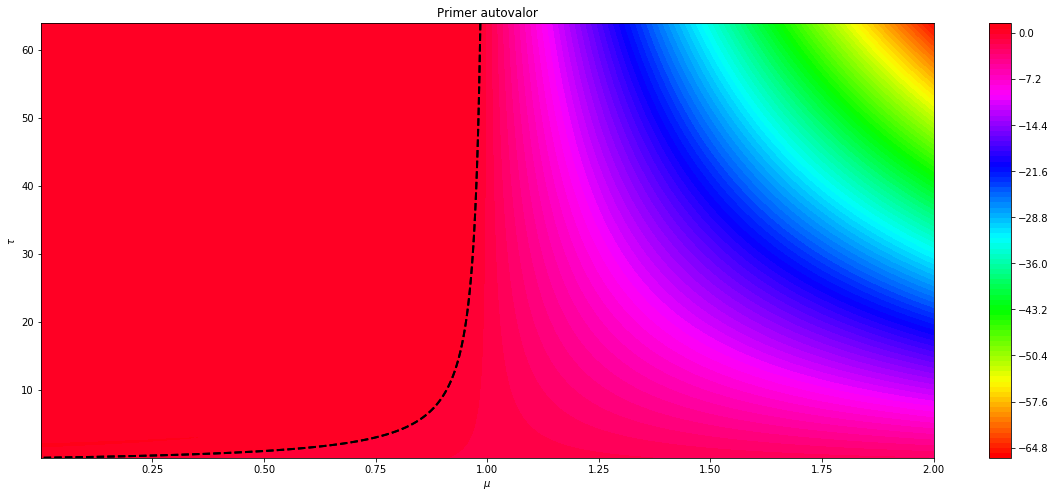

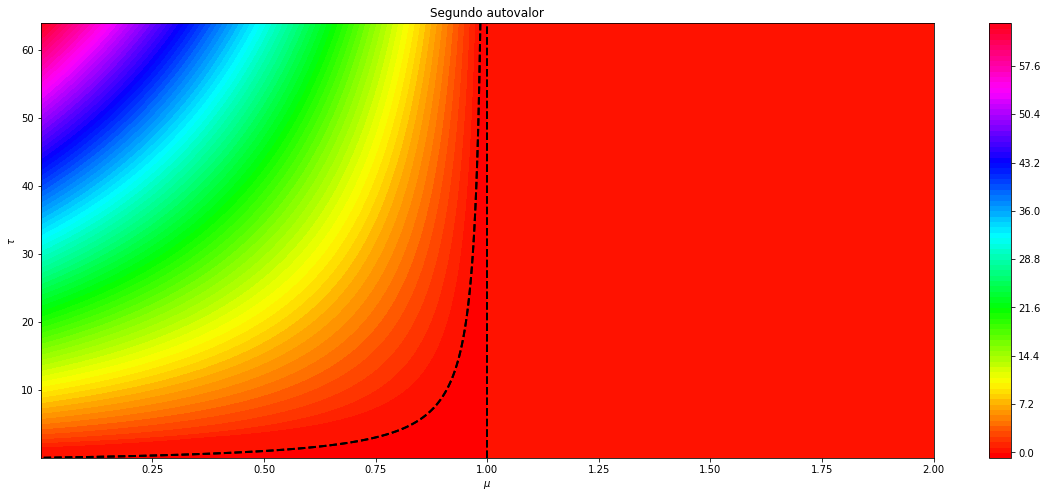

In [7]:
# Representación gráfica
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy.functions import re

f1 = sym.lambdify((μ, τ), re(λ[1][0]), 'numpy')
f2 = sym.lambdify((μ, τ), re(λ[1][1]), 'numpy')
μv, τv = np.mgrid[0.0001:2:1000j, 0.0001:64:1000j]

lstyle = {'linewidths': 2.0, 'colors': ['k'], 'linestyles': 'dashed'}

plt.figure(figsize=(20, 8))
Z = f1(μv, τv)
Z_min = np.abs(Z).min()
Z_max = Z.min(), Z.max()
scale = {'vmin': Z_max[0], 'vmax': Z_max[1], 'levels': 100}
plt.contourf(μv, τv, Z, cmap=plt.get_cmap('hsv'), **scale)
plt.colorbar()
plt.contour(μv, τv, Z, levels=[-Z_min, Z_min], **lstyle)
plt.xlabel('$\\mu$')
plt.ylabel('$\\tau$')
plt.title('Primer autovalor')

plt.figure(figsize=(20, 8))
Z = f2(μv, τv)
Z_min = np.abs(Z).min()
Z_max = Z.min(), Z.max()
scale = {'vmin': Z_max[0], 'vmax': Z_max[1], 'levels': 100}
plt.contourf(μv, τv, Z, cmap=plt.get_cmap('hsv'), **scale)
plt.colorbar()
plt.contour(μv, τv, Z, levels=[-Z_min, Z_min], **lstyle)
plt.xlabel('$\\mu$')
plt.ylabel('$\\tau$')
plt.title('Segundo autovalor')
None

Modificando ligeramente la escala de color y haciendo zoom, conseguimos que vean mejor los posibles cambios de signo

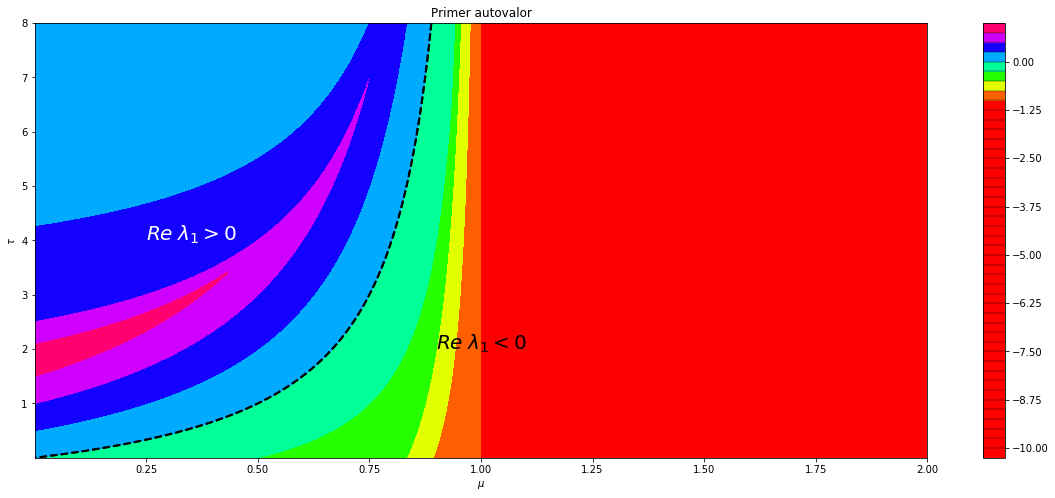

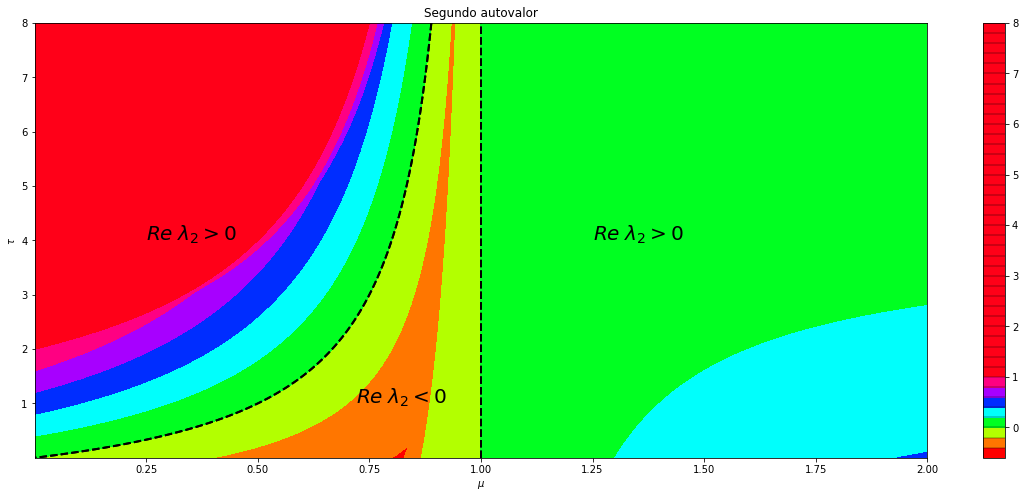

In [8]:
# Escala de color modificada: nos interesan los bordes donde se cambia de color

f1 = sym.lambdify((μ, τ), re(λ[1][0]), 'numpy')
f2 = sym.lambdify((μ, τ), re(λ[1][1]), 'numpy')
μv, τv = np.mgrid[0.0001:2:1000j, 0.0001:8:1000j]

lstyle = {'linewidths': 2.0, 'colors': ['k'], 'linestyles': 'dashed'}

plt.figure(figsize=(20, 8))
Z = f1(μv, τv)
Z_min = np.abs(Z).min()
Z_max = Z.min(), Z.max()
scale = {'vmin': -1, 'vmax': 1, 'levels': 50}
plt.contourf(μv, τv, Z, cmap=plt.get_cmap('hsv'), **scale)
plt.colorbar(drawedges=True)
plt.contour(μv, τv, Z, levels=[-Z_min, Z_min], **lstyle)
plt.xlabel('$\\mu$')
plt.ylabel('$\\tau$')
plt.title('Primer autovalor')
plt.text(x=0.25, y=4, s='$Re\;\lambda_1 > 0$', fontdict={'fontsize': 20, 'color': 'w'})
plt.text(x=0.9, y=2, s='$Re\;\lambda_1 < 0$', fontdict={'fontsize': 20, 'color': 'k'})

plt.figure(figsize=(20, 8))
Z = f2(μv, τv)
Z_min = np.abs(Z).min()
Z_max = Z.min(), Z.max()
scale = {'vmin': Z_max[0], 'vmax': 1, 'levels': 50}
plt.contourf(μv, τv, Z, cmap=plt.get_cmap('hsv'), **scale)
plt.colorbar(drawedges=True)
plt.contour(μv, τv, Z, levels=[-Z_min, Z_min], **lstyle)
plt.xlabel('$\\mu$')
plt.ylabel('$\\tau$')
plt.title('Segundo autovalor')
plt.text(x=0.25, y=4, s='$Re\;\lambda_2 > 0$', fontdict={'fontsize': 20, 'color': 'k'})
plt.text(x=0.72, y=1, s='$Re\;\lambda_2 < 0$', fontdict={'fontsize': 20, 'color': 'k'})
plt.text(x=1.25, y=4, s='$Re\;\lambda_2 > 0$', fontdict={'fontsize': 20, 'color': 'k'})

# fx = μv*(τv+1)-τv # Para comprobar si esta es la forma analítica de la curva
# plt.contour(μv, τv, fx, levels=[-Z_min, Z_min], **lstyle)
None

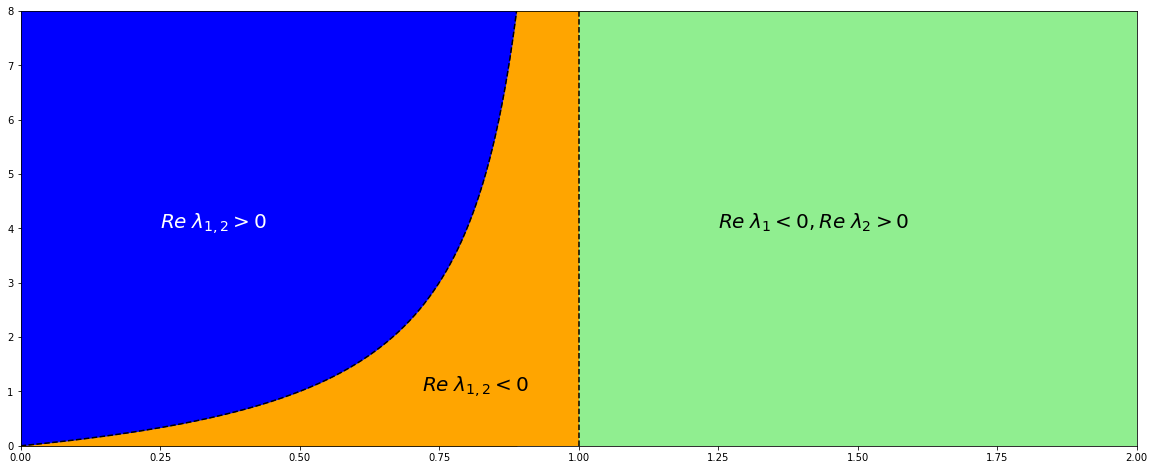

In [9]:
# Juntando los dos autovalores en una gráfica
%matplotlib inline
y = np.linspace(0, 8, 1000)
x = y/(y+1)
plt.figure(figsize=(20, 8))
plt.plot(x, y, '--k')
plt.axvline(x=1, c='k', ls='--')
plt.text(x=0.25, y=4, s='$Re\;\lambda_{1, 2} > 0$', fontdict={'fontsize': 20, 'color': 'w'})
plt.text(x=0.72, y=1, s='$Re\;\lambda_{1, 2} < 0$', fontdict={'fontsize': 20, 'color': 'k'})
plt.text(x=1.25, y=4, s='$Re\;\lambda_1 < 0, Re\;\lambda_2 > 0$', fontdict={'fontsize': 20, 'color': 'k'})
plt.axis((0, 2, 0, 8))
plt.fill_between(x, 0, y, color='orange')
plt.fill_between([x.max(), 1], 0, 10, color='orange')
plt.fill_between(x, 10, y, color='blue')
plt.fill_between([1, 3], 0, 10, color='lightgreen')

In [10]:
λ_plus = (λ[1][0] + λ[1][1])/2
λ_minus = (λ[1][0] - λ[1][1])/2

# Definimos dos variables λ_plus, λ_minus para describir ambos autovalores

display('λ_plus:', λ_plus)
display('λ_minus:', λ_minus)

'λ_plus:'

-μ*τ/2 - μ/2 + τ/2

'λ_minus:'

-sqrt(μ**2*τ**2 + 2*μ**2*τ + μ**2 - 2*μ*τ**2 - 2*μ*τ + 4*μ + τ**2 - 4)/2

Por lo tanto, los autovalores se pueden expresar como:
$$\lambda_{1,2}= \lambda_+ \pm \lambda_- = \frac{-\mu(\tau + 1) + \tau \pm \sqrt{\mu^2(\tau+1)^2 - 2\mu(\tau-1)(\tau+2) + (\tau-2)(\tau+2)}}{2}$$

$\lambda_{1}= \lambda_+ + \lambda_-, \lambda_{2}= \lambda_+ + \lambda_-$

La parte real de ambas expresiones puede anularse por dos causas: 
  * $\lambda_+ = \lambda_-$ y entonces sólo el segundo autovalor se anula
  * $\lambda_+ = 0$ y $\mathrm{Re}\{\lambda_-\} = 0$ y en ese caso, $\mathrm{Re}\{\lambda_{1,2}\} = 0$

In [11]:
# Para la segunda raíz, el valor μ=1 es un cero, mientras que para la segunda no
display(λ[1][1].subs({μ:1}))
display(λ[1][0].subs({μ:1}))

0

-1

In [12]:
# La parte real de la primera raíz siempre se anulará sobre la curva
# μ=τ/(τ+1) siempre que τ>-1
from sympy.functions import sqrt
expr = sym.simplify(λ[1][0].subs({μ:τ/(τ+1)}))
display(expr)
sqrt(sym.simplify(expr**2))

-sqrt(-(τ + 1)/(τ**2 + 2*τ + 1))

sqrt(-1/(τ + 1))

En resumen, 
$$\mu \ge \frac{\tau}{\tau+1} \implies \lambda_1 \le 0$$
$$\mu \ge \frac{\tau}{\tau+1}, \mu \le 1 \implies \lambda_2 \le 0$$
y gráficamente:

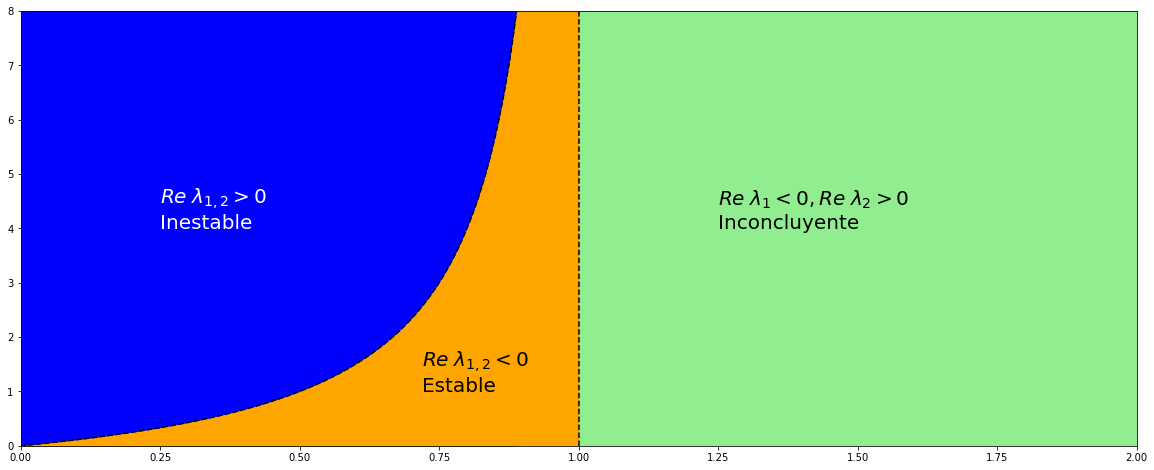

In [13]:
#
%matplotlib inline
y = np.linspace(0, 8, 1000)
x = y/(y+1)
plt.figure(figsize=(20, 8))
plt.plot(x, y, '--k')
plt.axvline(x=1, c='k', ls='--')
plt.text(x=0.25, y=4, s='$Re\;\lambda_{1, 2} > 0$\nInestable', fontdict={'fontsize': 20, 'color': 'w'})
plt.text(x=0.72, y=1, s='$Re\;\lambda_{1, 2} < 0$\nEstable', fontdict={'fontsize': 20, 'color': 'k'})
plt.text(x=1.25, y=4, s='$Re\;\lambda_1 < 0, Re\;\lambda_2 > 0$\nInconcluyente', fontdict={'fontsize': 20, 'color': 'k'})
plt.axis((0, 2, 0, 8))
plt.fill_between(x, 0, y, color='orange')
plt.fill_between([x.max(), 1], 0, 10, color='orange')
plt.fill_between(x, 10, y, color='blue')
plt.fill_between([1, 3], 0, 10, color='lightgreen')

En la zona verde, tenemos además que el punto de equilibrio $(1, 1-\mu)$ se sale del espacio de fases, ya que estamos considerando valores positivos de $x_1, x_2$. Por lo tanto, para que el espacio de fases tenga un **ciclo límite**, los valores de $\mu, \tau$ tienen que estar en la zona naranja.

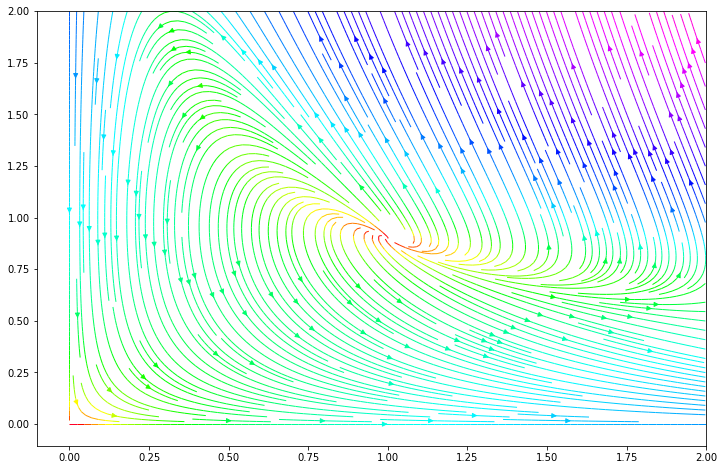

In [14]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
x = sym.Matrix([x1, x2])

# Comentar y descomentar las siguientes líneas para ver todos los casos:
fx = sym.lambdify(x, np.squeeze(f.subs({μ:0.1, τ:2.0})), 'numpy') # Región azul, foco inestable
# fx = sym.lambdify(x, np.squeeze(f.subs({μ:0.75, τ:1.0})), 'numpy') # Región naranja, foco estable
# fx = sym.lambdify(x, np.squeeze(f.subs({μ:2.0, τ:1.0})), 'numpy') # Región verde, fuera de gráfica

plt.figure(figsize=(12, 8))
xmax = 2.0
num = 100j
xv, yv = np.mgrid[slice(0, xmax,num),slice(0, xmax,num)]
fv = fx(yv, xv) # Hay que evaluarlos al revés

plt.streamplot(yv, xv, fv[0], fv[1], color=np.log(fv[0]**2+fv[1]**2+0.001), 
               cmap='gist_rainbow', linewidth=1.0, density=3)

# Ejercicio 3

In [15]:
import sympy as sym
import numpy as np
def Lorenz(σ=10, β=8/3, ρ=28):
    def f(x, t=0):
        y = np.empty_like(x)
        y[0] = σ*(x[1] - x[0])
        y[1] = x[0]*(ρ - x[2]) - x[1]
        y[2] = x[0]*x[1] - β*x[2]
        return y
    return f

x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')
x = sym.Matrix([x1, x2, x3])
σ=sym.Symbol('σ')
β=sym.Symbol('β')
ρ=sym.Symbol('ρ')

f = sym.Matrix(
    Lorenz(σ=σ, β=β, ρ=ρ)(x))

solutions, J, λ = calcular_puntos_eq(f, x, p0={σ:10, β:8/3, ρ:28})

Puntos de equilibrio: [(-8.48528137423857, -8.48528137423857, 27.0000000000000), (0.0, 0.0, 0.0), (8.48528137423857, 8.48528137423857, 27.0000000000000)]

Expandiendo J en el punto (-8.48528137423857, -8.48528137423857, 27.0000000000000)


Matrix([
[              -10,                10,                 0],
[              1.0,                -1,  8.48528137423857],
[-8.48528137423857, -8.48528137423857, -2.66666666666667]])

Autovalores:


-13.8545779145960

0.0939556239646855 + 10.1945052209278*I

0.0939556239646855 - 10.1945052209278*I

Expandiendo J en el punto (0.0, 0.0, 0.0)


Matrix([
[-10,  10,                 0],
[ 28,  -1,                 0],
[0.0, 0.0, -2.66666666666667]])

Autovalores:


-2.66666666666667

11.8277234511635

-22.8277234511635

Expandiendo J en el punto (8.48528137423857, 8.48528137423857, 27.0000000000000)


Matrix([
[             -10,               10,                 0],
[             1.0,               -1, -8.48528137423857],
[8.48528137423857, 8.48528137423857, -2.66666666666667]])

Autovalores:


-13.8545779145960

0.0939556239646855 + 10.1945052209278*I

0.0939556239646855 - 10.1945052209278*I

Como las tres soluciones tienen al menos un autovalor con parte real positiva, no podemos concluir nada del comportamiento del sistema general no lineal, ya que podría ser estable, asintóticamente estable o inestable. Sin embargo la primera y la tercera solución (que tienen los mismos autovalores y son simétricas respecto de reflexión en las coordenadas $x, y$) tienen raíces complejas, lo que indica que existen trayectorias oscilatorias.

In [16]:
# La solución que nos interesa en este apartado es la tercera
x0_e = solutions[2][0].evalf()

def LorenzControl(σ=10, β=8/3, ρ=28, k=1):
    def f(x, t=0):
        y = np.empty_like(x)
        y[0] = σ*(x[1] - x[0])
        y[1] = x[0]*(ρ - x[2]) - x[1] - k*(x[0]-x0_e)
        y[2] = x[0]*x[1] - β*x[2]
        return y
    return f

k = sym.Symbol('k')

f = sym.Matrix(
    LorenzControl(k=k)(x))

_, J, _ = calcular_puntos_eq(f, x, x0=solutions[2], print_info=False)
None

In [17]:
J.subs(dict(zip(x, solutions[2])))

Matrix([
[             -10,               10,                 0],
[         1.0 - k,               -1, -8.48528137423857],
[8.48528137423857, 8.48528137423857, -2.66666666666667]])

In [18]:
display(solutions[2][0])
display(solutions[2][0]**2)

8.48528137423857

72.0000000000000

Podemos reescribir esta matriz de manera más compacta reconociendo que el valor de $x_{1,e}$ es $\sqrt{72}$:

In [19]:
from sympy.functions import sqrt

Jsym = sym.Matrix([[-10, 10, 0],
[1-k, -1, -sqrt(72)],
[sqrt(72), sqrt(72), sym.Rational(-8, 3)]])
Jsym

Matrix([
[      -10,        10,          0],
[    1 - k,        -1, -6*sqrt(2)],
[6*sqrt(2), 6*sqrt(2),       -8/3]])

Y por último escribimos la ecuación de autovalores de la matriz:

In [20]:
z = sym.Symbol('z')
eq = (Jsym - sym.Matrix.eye(3)*z).det()
eq

-72*z - (10 - 10*k)*(-z - 8/3) + (-z - 10)*(-z - 8/3)*(-z - 1) - 1440

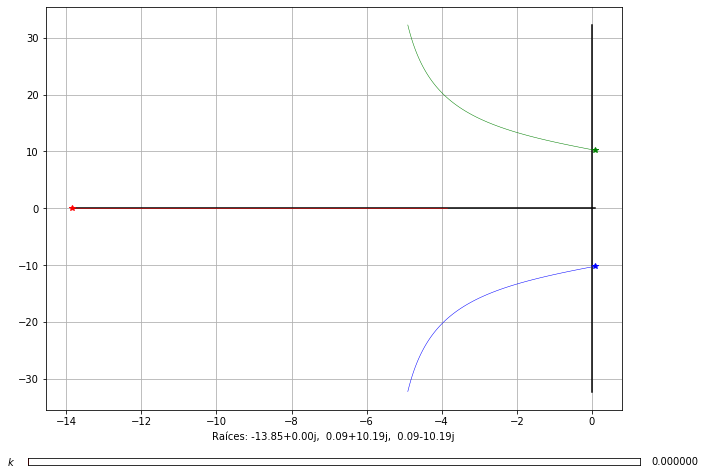

In [21]:
# Representacion interactiva de lugar de raíces según modificamos el parámetro k
# Se recomienda correr el script independiente Lorenz_rloc.py para mejor rendimiento
%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Valores máximos y mínimos de k
kmin = 0
kmax = 100
kvec = np.linspace(kmin, kmax, 100)

expr = sym.solve(eq, z)
f = sym.lambdify(k, expr, 'numpy')
xv = np.real(f(kvec))
yv = np.imag(f(kvec))

def rloc(kval):
    old_ax = ax1.axis()
    ax1.cla()
    ax1.plot([0, 0], [yv.min(), yv.max()], '-k')
    ax1.plot([xv.min(), xv.max()], [0, 0], '-k')
    ax1.grid(True)
    color = ['r', 'g', 'b'] # Código de color para las raíces
    label = []
    for dim in range(0, 3):
        ax1.plot(xv[dim], yv[dim], f'-{color[dim]}', linewidth=0.5)
        x, y = np.real(f(kval)[dim]), np.imag(f(kval)[dim])
        ax1.plot(x, y, f'{color[dim]}*')
        label.append(f'{x:1.2f}{y:+1.2f}j')
    ax1.set_xlabel('Raíces: '+',  '.join(label))
    if old_ax != (0.0, 1.0, 0.0, 1.0):
        ax1.axis(old_ax)

plt.figure(figsize=(10, 7))
ax1 = plt.axes([0.075, 0.15, 0.8, 0.8])
ax2 = plt.axes([0.05, 0.04, 0.85, 0.015])
w = Slider(ax2, '$k$', valmin=kmin, valmax=kmax, valinit=kmin, valfmt="%1.6f")
rloc(kmin)
w.on_changed(rloc)
None

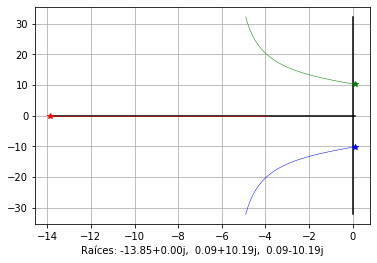

In [22]:
# Versión manual por si no funciona la versión interactiva con Qt
%matplotlib inline
ax1 = plt.subplot()

kval = 0 # Modificarlo a mano para ver cómo varían las raíces
rloc(kval)

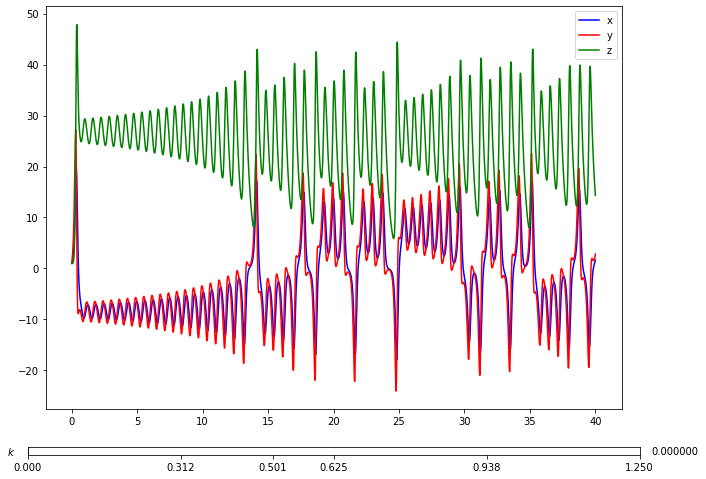

In [23]:
# Representacion interactiva de dinámica del sistema según modificamos el parámetro k
# Se recomienda correr el script independiente Lorenz_dynamics.py para mejor rendimiento
%matplotlib qt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def LorenzControl(σ=10, β=8/3, ρ=28, k=1):
    def f(x, t=0):
        y = np.empty_like(x)
        y[0] = σ*(x[1] - x[0])
        y[1] = x[0]*(ρ - x[2]) - x[1] - k*(x[0]-x0_e)
        y[2] = x[0]*x[1] - β*x[2]
        return y
    return f


# Valores máximos y mínimos de k
kmin = 0
kmax = 1.25
kvec = np.linspace(kmin, kmax, 100)

t = np.linspace(0.0, 40.0, 2000) # array de tiempo de integración
x0 = np.array([1.0, 1.0, 1.0]) # Condiciones iniciales
def LorenzStability(kval):
    x = odeint(LorenzControl(k=kval), x0, t).T
    ax1.cla()
    ax1.plot(t, x[0], 'b-')
    ax1.plot(t, x[1], 'r-')
    ax1.plot(t, x[2], 'g-')
    ax1.legend(('x', 'y', 'z'), loc='upper right')

plt.figure(figsize=(10, 7))
ax1 = plt.axes([0.075, 0.15, 0.8, 0.8])
ax2 = plt.axes([0.05, 0.06, 0.85, 0.015])
w = Slider(ax2, '$k$', valmin=kmin, valmax=kmax, valinit=kmin, valfmt="%1.6f")
LorenzStability(kmin)
ax2.xaxis.set_visible(True)
ax2.set_xticks(np.concatenate((np.linspace(kmin, kmax, 5), [0.50101])))
w.on_changed(LorenzStability)
None

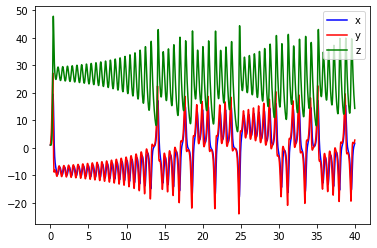

In [24]:
# Versión manual por si no funciona la versión interactiva con Qt
%matplotlib inline
ax1 = plt.subplot()

kval = 0 # Modificarlo a mano para ver cómo varían las raíces
t = np.linspace(0.0, 40.0, 2000) # array de tiempo de integración
x0 = np.array([1.0, 1.0, 1.0]) # Condiciones iniciales
LorenzStability(kmin)

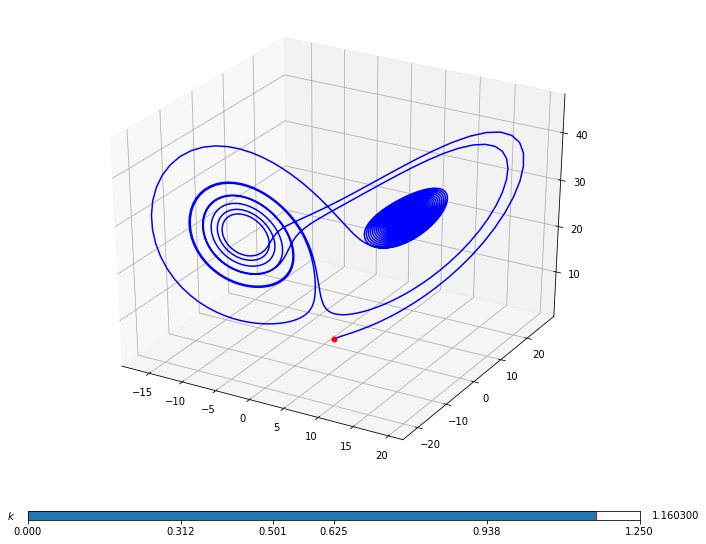

In [25]:
# Visualización de cómo afecta el control al espacio de fases según modificamos el parámetro k
# Se recomienda correr el script independiente Lorenz_phase.py para mejor rendimiento
%matplotlib qt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
from random import choice

def LorenzControl(σ=10, β=8/3, ρ=28, k=1):
    def f(x, t=0):
        y = np.empty_like(x)
        y[0] = σ*(x[1] - x[0])
        y[1] = x[0]*(ρ - x[2]) - x[1] - k*(x[0]-x0_e)
        y[2] = x[0]*x[1] - β*x[2]
        return y
    return f


# Valores máximos y mínimos de k
kmin = 0
kmax = 1.25
kvec = np.linspace(kmin, kmax, 100)

t = np.linspace(0.0, 40.0, 4000) # array de tiempo de integración
x0 = np.array([1.0, 1.0, 1.0]) # Condiciones iniciales

plt.ion()

# Variables globales: animación de la bolita
ani = None

def animate(i, *fargs):
    x = fargs[0]
    ln = fargs[1]
    # Pintar la bolita en el instante t[i]
    ln.set_data_3d([x[0][i]], [x[1][i]], [x[2][i]])
    ln.set_color('r')
    ln.set_marker('.')
    ln.set_markersize(10)
    return ln,

def LorenzButterfly(kval):
    global ani
    if ani is not None:
        ani.event_source.stop() # parar ani si no está corriendo
    x = odeint(LorenzControl(k=kval), x0, t).T # integrar el modelo
    ax1.cla()
    fix_ln = ax1.plot(x[0], x[1], x[2], 'b-')[0]
    ln = ax1.plot([], [], [])[0]
    fig = plt.gcf()
    ani = FuncAnimation(fig, animate, frames=np.arange(t.size), repeat=False, fargs=(x,ln), interval=0, blit=True)
    return ani

plt.figure(figsize=(10,8))
ax1 = plt.axes([0.075, 0.15, 0.8, 0.8], projection='3d')
ax2 = plt.axes([0.05, 0.06, 0.85, 0.015])
# Resultan ser unos valores muy buenos para el control:
kinit = choice([0.926, 1.1603])
w = Slider(ax2, '$k$', valmin=kmin, valmax=kmax, valinit=kinit, valfmt="%1.6f")
ax2.xaxis.set_visible(True)
ax2.set_xticks(np.concatenate((np.linspace(kmin, kmax, 5), [0.50101])))

ani = LorenzButterfly(kinit)

plt.connect('button_press_event', lambda event: ani.event_source.stop())
plt.connect('button_release_event', lambda event: ani.event_source.start())
w.on_changed(LorenzButterfly)
None

In [26]:
x0_e

8.48528137423857

# Ejercicio 4

In [27]:
import sympy as sym
    
x1 = sym.Symbol('x1', real=True)
x2 = sym.Symbol('x2', real=True)
x3 = sym.Symbol('x3', real=True)
x = sym.Matrix([x1, x2, x3])
a = sym.Symbol('a', real=True)
b = sym.Symbol('b', real=True)
c = sym.Symbol('c', real=True)

f = sym.Matrix([x1 - x1*x2 - x3, x1**2 - a*x2, b*x1 - c*x3]).subs({a:0.1, b:0.1, c:14})

solutions, J, λ = calcular_puntos_eq(f, x, evalf=True)

Puntos de equilibrio: [(-0.315096357144468, 0.992857142857143, -0.00225068826531763), (0.0, 0.0, 0.0), (0.315096357144468, 0.992857142857143, 0.00225068826531763)]

Expandiendo J en el punto (-0.315096357144468, 0.992857142857143, -0.00225068826531763)


Matrix([
[0.00714285714285712, 0.315096357144468,  -1],
[ -0.630192714288937,              -0.1,   0],
[                0.1,                 0, -14]])

Autovalores:


-13.9928644315041

-0.0499963556765164 + 0.442914272940827*I

-0.0499963556765164 - 0.442914272940827*I

Expandiendo J en el punto (0.0, 0.0, 0.0)


Matrix([
[  1,    0,  -1],
[  0, -0.1,   0],
[0.1,    0, -14]])

Autovalores:


-0.100000000000000

0.993330367733696

-13.9933303677337

Expandiendo J en el punto (0.315096357144468, 0.992857142857143, 0.00225068826531763)


Matrix([
[0.00714285714285712, -0.315096357144468,  -1],
[  0.630192714288937,               -0.1,   0],
[                0.1,                  0, -14]])

Autovalores:


-13.9928644315041

-0.0499963556765164 + 0.442914272940827*I

-0.0499963556765164 - 0.442914272940827*I

Lo primero que observamos es que el primer y tercer punto de equilibrio son simétricos, y resultan ser los dos estables, mientras que con este análisis no podemos concluir nada del tercer punto de equilibrio.

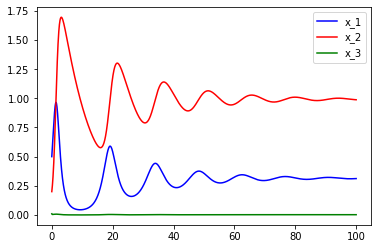

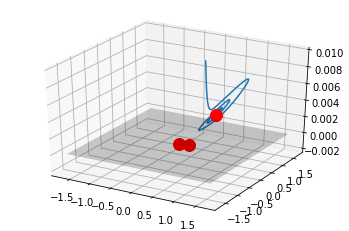

In [28]:
%matplotlib qt
import numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

x0 = np.array([0.5, 0.2, 0.01])
t = np.linspace(0.0, 100.0, 2000)
temp = sym.lambdify([x1, x2, x3], f.subs({a: 0.1, b:0.1, c:14}), 'numpy')
modelo = lambda x, t=0: np.squeeze(temp(x[0], x[1], x[2]))

x = odeint(modelo, x0, t).T

plt.figure()
plt.plot(t, x[0], 'b-')
plt.plot(t, x[1], 'r-')
plt.plot(t, x[2], 'g-')
plt.legend(('x_1', 'x_2', 'x_3'), loc='upper right')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[0], x[1], x[2])
for p in solutions:
    ax.plot([p[0]], [p[1]], [p[2]], 'ro', ms=12)
w = max(x.max(), -x.min())
xx, yy = np.mgrid[-w:w:2j, -w:w:2j]
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='k', alpha=0.2) # Plano Z = 0
plt.show()

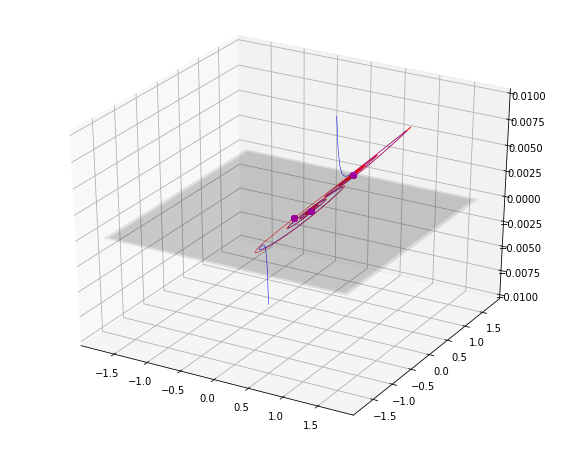

In [29]:
%matplotlib qt
import numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0.0, 100.0, 2000)
temp = sym.lambdify([x1, x2, x3], f.subs({a: 0.1, b:0.1, c:14}), 'numpy')
modelo = lambda x, t=0: np.squeeze(temp(x[0], x[1], x[2]))

condiciones_iniciales = [[0.5, 0.2, 0.01], [0.01, 0.01, 0.0], [-0.5, 0.2, -0.01], [-0.01, 0.01, 0.0]]
colores = 'b', 'r', 'b', 'r'

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for x0, color in zip(condiciones_iniciales, colores):

    x = odeint(modelo, x0, t).T

    ax.plot(x[0], x[1], x[2], color=color, lw=0.5)
    for p in solutions:
        ax.plot([p[0]], [p[1]], [p[2]], 'mo', ms=6)
    w = max(x.max(), -x.min())
    xx, yy = np.mgrid[-w:w:2j, -w:w:2j]
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, color='k', alpha=0.05) # Plano Z = 0
plt.show()

Cambiando las condiciones iniciales cerca del punto (0, 0, 0) podemos convencernos de que ese punto de equilibrio es inestable en el sistema completo no lineal.

# Ejercicio 5

Puntos de equilibrio: [(0, 0)]

Expandiendo J en el punto (0, 0)


Matrix([
[ 0,  1],
[-1, -1]])

Autovalores:


-1/2 - sqrt(3)*I/2

-1/2 + sqrt(3)*I/2

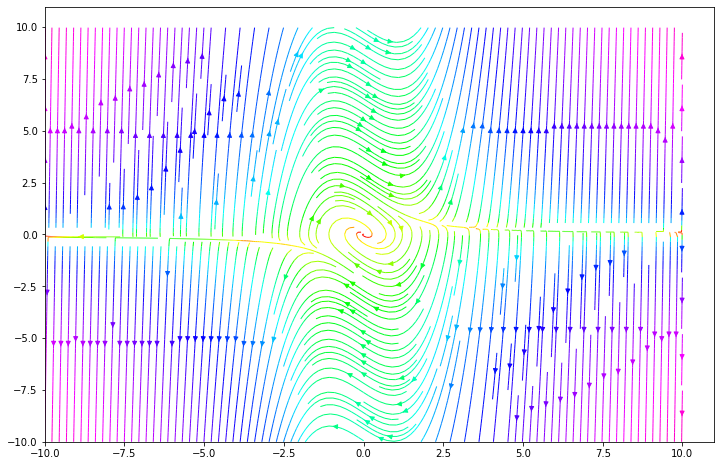

In [30]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from matplotlib.colors import Normalize

    
x1 = sym.Symbol('x1', real=True)
x2 = sym.Symbol('x2', real=True)
x = sym.Matrix([x1, x2])

f = sym.Matrix([x2, -x1+x2*(x1**2 - 1)]).T

calcular_puntos_eq(f, x, x0=(0, 0))
None

plt.figure(figsize=(12, 8))
xmax = 10.0
num = 100j
xv, yv = np.mgrid[slice(-xmax, xmax,num),slice(-xmax, xmax,num)]
fx = sym.lambdify(x, np.squeeze(f), 'numpy')
fv = fx(yv, xv) # Hay que evaluarlos al revés

x = np.linspace(-xmax, xmax, int(num.imag))
y = x/(x**2-1)


plt.streamplot(yv, xv, fv[0], fv[1], color=np.log(fv[0]**2+fv[1]**2), 
               cmap='gist_rainbow', linewidth=1.0, density=3)
# plt.axvline(x=1, c='k')
# plt.axvline(x=-1, c='k')
# plt.plot(x, y, 'b-', alpha=0.2)

Para estudiar este sistema, resulta más sencillo transformarlo en una ecuación de segundo grado:
$$\ddot{x}_1 - (x_1^2-1)\dot{x}_1 + x_1 = 0$$
Resulta ser un oscilador no lineal amortiguado con coeficiente $(x_1^2-1)$ y con frecuencia de oscilación $1$

Así, si $|x_1| > 1$ el sistema será inestable, salvo que la oscilación lo lleve a una región estable del espacio de fases. Igualmente, si $|x_1| < 1$, el sistema será estable, salvo que la oscilación lo lleve a una región estable.

Escogiendo como función de Lyapunov $V(x_1, x_2) = \frac{1}{2}x_1^2 + \frac{1}{2}x_2^2$

$$\dot{V}(x_1, x_2) = \frac{\partial V}{\partial \vec{x}} \cdot \frac{d\vec{x}}{dt} = x_2^2(x_1^2-1)$$

que cumplirá $V(\vec{x}) \le 0$ en $|x_1| \le 1$

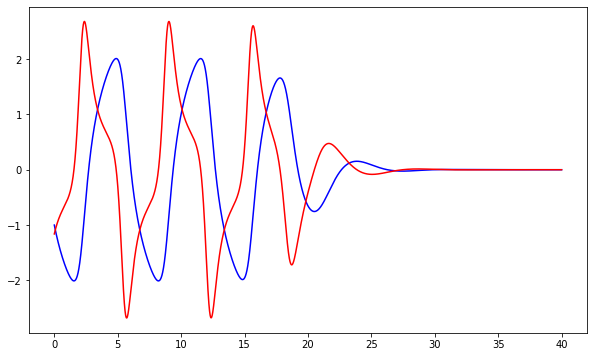

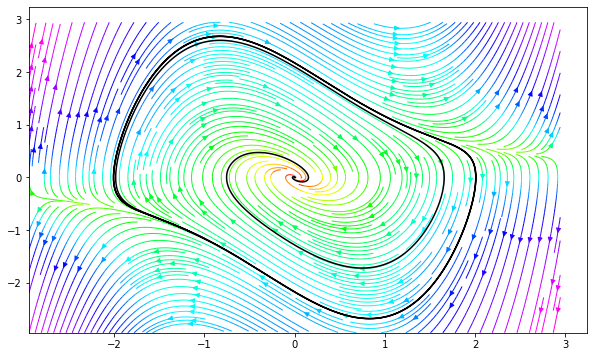

In [31]:
%matplotlib inline
from scipy.integrate import odeint

def fun(x, t=0):
    y = np.empty_like(x)
    y[0] = x[1]
    y[1] = -x[0]+x[1]*(x[0]**2 - 1)
    return y

x0 = np.array([-1, -1.160247947]) # El punto es muy artificial, pero se ve claramente el cíclo límite
t = np.linspace(0.0, 40.0, 8000)
    
x = odeint(fun, x0, t).T

plt.figure(figsize=(10, 6))
plt.plot(t, x[0], 'b-')
plt.plot(t, x[1], 'r-')
plt.figure(figsize=(10, 6))
plt.plot(x[0], x[1], 'k-')
xmax = 1.1*max(x.max(), -x.min())
num = 30j
xv, yv = np.mgrid[slice(-xmax, xmax,num),slice(-xmax, xmax,num)]
fv = fx(yv, xv)
plt.streamplot(yv, xv, fv[0], fv[1], color=np.log(fv[0]**2+fv[1]**2), 
               cmap='gist_rainbow', linewidth=1.0, density=3)